## 🧠 Model Interpretation with SHAP 

### 🎯 Objective:

To understand and visualize **how each feature contributes** to model predictions using **SHAP (SHapley Additive exPlanations)**.

---

## 🔷 **Step 1: Why Model Interpretability Matters**

### 🔹 Step 1: Why Model Interpretability Matters

> Even accurate models need interpretability — especially in healthcare, finance, and HR — to ensure fairness, transparency, and trust.

---

### ✅ 1. **The Problem with Black-Box Models**

Models like **XGBoost, LightGBM, and Neural Networks** are called **black-box models** because:

* They **don’t tell you why** they made a prediction

* They just give you the **final output** — not the reasoning

* This is risky in **critical domains** like:

  * ✅ **Healthcare** (e.g., cancer detected: why?)

  * ✅ **Banking** (e.g., loan rejected: why?)

  * ✅ **Recruitment** (e.g., job denied: why?)

  * ✅ **Legal/Finance** (e.g., flagged for fraud: why?)

> 🧠 Even if your model is 97% accurate, it **must be explainable** to be trusted and used in real life.

---

### ✅ 2. **How Lack of Interpretability Can Hurt**

Without interpretability:

* ⚠️ People may think the model is **biased** or **unfair**

* ⚠️ Stakeholders won’t adopt your solution in a company

* ⚠️ You won’t know **what features are actually driving predictions** (so hard to improve)

* ⚠️ Regulators may **ban or reject** your model (especially in healthcare/finance)

---

### ✅ 3. **Benefits of Making Your Models Explainable**

| 🚀 Benefit                  | 💡 Why It Matters                                                  |
| --------------------------- | ------------------------------------------------------------------ |
| ✅ Builds trust              | Stakeholders can **understand** and **accept** predictions         |
| ✅ Debug your models         | You can see if model is relying on **wrong or noisy features**     |
| ✅ Comply with laws          | Legal frameworks (e.g., GDPR) require explainability               |
| ✅ Improves future models    | You know which features matter most — so you can **refine inputs** |
| ✅ Helps non-technical teams | Business teams can **understand output** without ML knowledge      |

---

### ✅ 4. **Real Example: SHAP in Action**

Imagine this:

> A model predicts that a patient is likely to have **breast cancer**.

Without SHAP:

* Doctor: "Why?"

* Model: *"Because I said so."* ❌

With SHAP:

* SHAP: *"Because ‘mean radius’ and ‘worst texture’ were high in this patient — which are strong indicators."* ✅

This is **how SHAP helps build real-world trust** — especially when **lives or money** are involved.

---

### 🔑 Summary:

> 🔍 **Interpretability bridges the gap** between machine learning and **real-world trust, ethics, and responsibility**.

---

## 🔷 **Step 2: What is SHAP? (SHapley Additive exPlanations)**

### 🔹 Step 2: What is SHAP?

* **SHAP** stands for **SHapley Additive exPlanations**.
* It assigns each feature an importance value for a particular prediction based on **game theory**.

---

### ✅ What does SHAP do?

SHAP explains **how much each feature contributed** to a particular prediction — either by **increasing** or **decreasing** the final output.

> 🎯 It answers:

> “**Why did the model predict this output for this input?**”

> “**Which features helped the model the most?**”

---

### 🧠 **SHAP comes from Game Theory**

> Imagine a team working on a group project.

> SHAP calculates how much *each person* (feature) contributed to the final success (prediction).

In game theory terms:

* The **model prediction** = the **payout from a game**

* Each **feature** = a **player**

* SHAP values = the **fair share** each player deserves based on their contribution to the payout

✅ This makes SHAP **mathematically fair and consistent**.

---

### ✅ How SHAP Works (Simple Terms):

Let’s say we predict whether a patient has cancer:

| Feature       | Value | SHAP Value | Impact                |
| ------------- | ----- | ---------- | --------------------- |
| Mean Radius   | 15.0  | +0.4       | Increased probability |
| Mean Texture  | 22.5  | +0.3       | Increased probability |
| Mean Symmetry | 0.18  | -0.2       | Decreased probability |

🔹 Final prediction = 0.5 (base value) + 0.4 + 0.3 − 0.2 = **1.0 (very high)**

So, SHAP shows which features **pushed the prediction up** and which ones **pulled it down**.

---

### ✅ SHAP Can Be Used in 2 Ways:

#### 1. **Global Interpretability**

* What are the **most important features overall**?

* Use `shap.summary_plot()` to visualize feature importances across the dataset.

#### 2. **Local Interpretability**

* Why did the model give *this prediction* for *this row*?

* Use `shap.force_plot()` or `shap.waterfall_plot()` to explain **individual predictions**.

---

### ✅ Key Benefits of SHAP:

| Advantage               | What It Means                                             |
| ----------------------- | --------------------------------------------------------- |
| 🔍 Works with any model | Tree, linear, neural nets, SVM, etc.                      |
| ✅ Consistent & Fair     | Based on proven Shapley values from game theory           |
| 🧠 Human-understandable | Shows how much each feature pushed prediction up/down     |
| 📊 Visual & intuitive   | SHAP plots are **very readable** even for non-tech people |

---

### 🔑 Intuition:

> SHAP treats a model prediction like a **teamwork outcome** and tells you **how much credit each feature gets** for the final result.

---

## 🔷 **Step 3: Types of SHAP Explanations**

To truly interpret your ML model with SHAP, you need to know **which plot to use for what kind of explanation**.

Here’s a breakdown of the **three most useful SHAP plots**, when to use them, and what they show:

---

### 🔹 Step 3: Types of SHAP Explanations

| Function            | Description                | Usage                            |
| ------------------- | -------------------------- | -------------------------------- |
| `summary_plot()`    | Global feature importance  | To see what features matter most |
| `dependence_plot()` | Impact of a single feature | Understand individual trends     |
| `force_plot()`      | Per-instance explanation   | Explain one prediction clearly   |

---

### ✅ 1. `summary_plot()`

🔹 **Purpose:**

Shows the **global importance** of all features in your dataset.

🔹 **What it tells you:**

* Which features are **most influential overall**.

* How each feature’s **values affect predictions**.

* Positive vs. negative SHAP values.

🔹 **Visualization Style:**

* A **colored swarm plot** (beeswarm)

* Red dots = high feature values, blue = low

* Features listed from most to least impactful.

🔹 **Use this when:**

You want a **big-picture overview** of what your model relies on the most.

🔧 **Code:**

```python
shap.summary_plot(shap_values, x)
```

---

### ✅ 2. `dependence_plot()`

🔹 **Purpose:**

Shows how **a single feature’s value** changes the SHAP value (i.e., its effect on prediction).

🔹 **What it tells you:**

* Whether the feature has a **positive or negative impact**

* Whether the effect is **linear, non-linear, or interacts** with another feature

* Detects **feature interactions** automatically

🔹 **Use this when:**

You want to **analyze the behavior of one specific feature** in depth.

🔧 **Code:**

```python
shap.dependence_plot("feature_name", shap_values, x)
```

---

### ✅ 3. `force_plot()`

🔹 **Purpose:**

Explains a **single prediction** (one row of your dataset).

🔹 **What it tells you:**

* How each feature **pushed the prediction higher or lower**

* Useful for explaining decisions to **non-technical people**

* Can be visualized as a **horizontal bar** showing contributions

🔹 **Use this when:**

You want to **explain one particular prediction**, e.g., “Why was this patient predicted as high risk?”

🔧 **Code:**

```python
shap.force_plot(explainer.expected_value, shap_values[i], X.iloc[i])
```

📌 Tip: `force_plot` is **interactive in notebooks**, but static when saved as an image. Use Jupyter for full experience.

---

### ✅ Comparison Table Recap:

| SHAP Plot           | Best For                                  | Output Type            |
| ------------------- | ----------------------------------------- | ---------------------- |
| `summary_plot()`    | Global view of most important features    | All features at once   |
| `dependence_plot()` | Understanding a single feature’s behavior | One feature at a time  |
| `force_plot()`      | Explaining a single prediction            | One instance at a time |

---

## 🔷 **Step 4: Install and Import SHAP**

Before we can use SHAP to interpret our models, we need to install it and import the required tools.

---

### ✅ **Step 4.1: Installation**

In [25]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


🛠️ This installs the official SHAP library that works with most ML models like:

* XGBoost

* LightGBM

* CatBoost

* Sklearn models

---

### ✅ **Step 4.2: Import SHAP**

In [2]:
import shap


This gives access to SHAP explainers, visual plots, and the internal logic behind feature importance.

---


### ✅ Optional but Recommended:

If using Jupyter Notebooks and you want interactive plots like `force_plot`, run this line too:


In [3]:
shap.initjs()


This initializes SHAP’s JavaScript visualizations (used in `force_plot()`).

---


## 🔷 Step 5: Use SHAP on Your Trained Model

We’ll now explain how to use SHAP to understand the predictions made by a model (we'll use XGBoost here, but the same works for LightGBM too).

---

Before using SHAP, we **must** have a trained model to explain. So let’s backtrack and **train an XGBoost model** on the Breast Cancer dataset first.

### ✅ Train an XGBoost Model on Breast Cancer Dataset

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
x = data.data
y = data.target
print(data.target_names)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Train XGBoost model
model = XGBClassifier()
model.fit(x_train, y_train)

# Predict and evaluate
y_pred = model.predict(x_test)
print("Test Accuracy :", accuracy_score(y_test, y_pred))

['malignant' 'benign']
Test Accuracy : 0.956140350877193


---

### ✅ Use SHAP on Your Trained Model

## 📌 What You'll See in the Plot:

* Each **dot** is a SHAP value for a single feature and sample.
* The **color** shows the feature value (red = high, blue = low).
* The **position on X-axis** shows whether the feature increased or decreased the prediction.

---

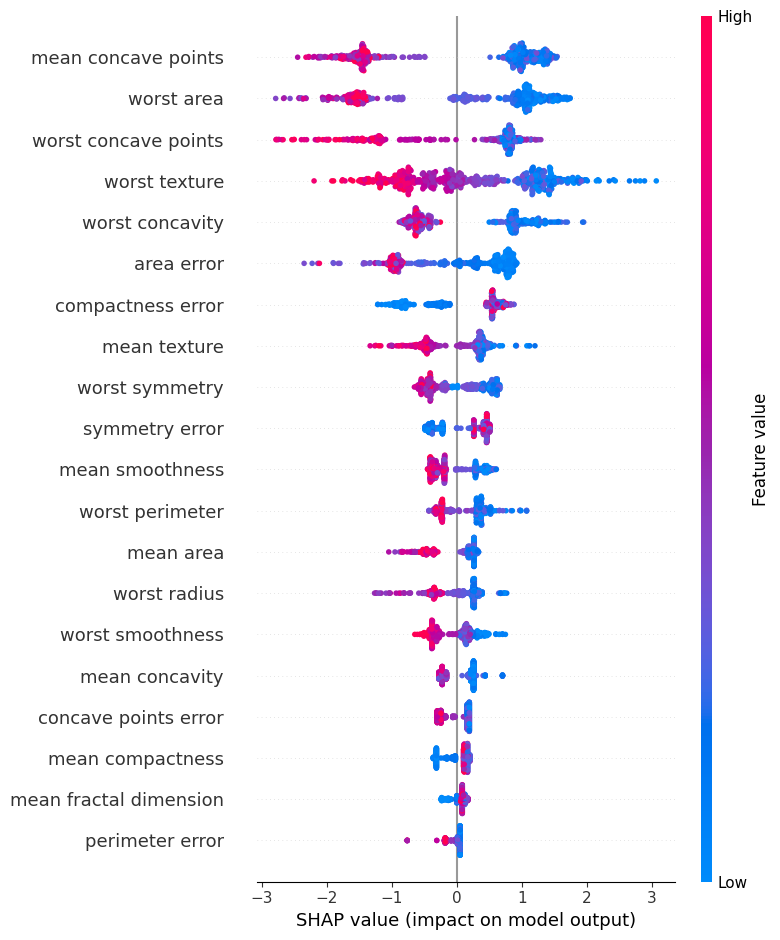

In [30]:
# Create SHAP explainer using the trained model
explainer = shap.TreeExplainer(model)  #shap.TreeExplainer(): This function creates an explainer specifically for tree-based models like XGBoost or LightGBM.
                                       #model: This is your already trained model (like XGBoost). SHAP uses it to calculate contributions of features.

# Calculate SHAP values for the features
shap_values = explainer.shap_values(x) #explainer.shap_values(): Computes how much each feature increased or decreased the model’s prediction.
                                       #X: We want to explain predictions on our original data.

# Summary plot for global feature importance
shap.summary_plot(shap_values, x, feature_names=data.feature_names)
# summary_plot():
  #Shows a global view of which features matter most.
  #Helps answer: “Which features most influence predictions across the dataset?”
# shap_values: The computed SHAP values.
# x: Original data (to match values with SHAP importance).
# feature_names: Gives feature names (like ‘mean radius’, ‘mean texture’, etc.) for easy understanding.

* **Class 0 = malignant**

* **Class 1 = benign**

* **SHAP value < 0 → pushes toward malignant**

* **SHAP value > 0 → pushes toward benign**

Let’s now give a **complete interpretation of this SHAP summary plot** 👇

---

## 🔍 What This Plot Tells You (Overall Summary):

This SHAP summary plot shows **which features most influence your model’s predictions** and **how they push the prediction** toward malignant (0) or benign (1).

---

## ✅ Interpretation of Top Features:

### 1. **`mean concave points`**

* 🔴 **High values** (red) push SHAP < 0 → toward **malignant**

* 🔵 **Low values** (blue) push SHAP > 0 → toward **benign**

* ✅ Meaning: If a tumor has **more concave points**, it's likely **malignant**

---

### 2. **`worst area`**

* 🔴 High values push SHAP < 0 → **malignant**

* 🔵 Low values push SHAP > 0 → **benign**

* ✅ Larger tumor area = more likely to be malignant

---

### 3. **`worst concave points`**

* Same as above:

  * High values → SHAP < 0 → malignant

  * Low values → SHAP > 0 → benign

* ✅ More concave points in worst-case section = more malignant

---

### 4. **`worst texture`**

* Mixed pattern: red and blue on both sides

* ℹ️ Model is a bit uncertain or the relationship is nonlinear

* 📌 Not as strong a predictor as the top three

---

### 5. **`worst concavity`**

* Mostly red on left, blue on right

* ✅ Higher concavity = higher chance of malignancy

---

## 📊 Middle & Lower Features:

* Features like `area error`, `mean texture`, `compactness error`, etc. follow similar trends:

  * High values usually push toward **malignant**


  * Low values toward **benign**

* Bottom features like `perimeter error`, `mean compactness`, etc. show **smaller SHAP values**, meaning they **have less influence** on predictions.

---

## 🧠 Final Summary for Report or Notebook:

> 🔍 **SHAP Summary Interpretation**:

> The model relies heavily on shape and size-related features like `mean concave points`, `worst area`, and `worst concavity`. High values of these features (shown in red) consistently push predictions toward malignancy, while lower values push predictions toward benign classification. This aligns well with medical knowledge, where irregular and larger tumors are more likely to be malignant.

> Features near the bottom have much smaller SHAP values and thus contribute less to the model’s decision-making.

---

## 🔷 Step 6: Visualize SHAP Interpretations

---

### ✅ 1. **Global Feature Importance**

### 🔍 What this shows:

* A **beeswarm plot** (like we already saw) 🌈
* Each dot = one row from your data
* X-axis = SHAP value → how much that feature pushed the prediction
* Color = feature value (red = high, blue = low)

✅ Use it when you want to answer:

> "Which features are most important across the whole dataset?"

You’ve already seen this and interpreted it brilliantly!

### 🔹 Step 6A: Global Feature Importance

📊 Shows the most important features pushing predictions up/down.

---

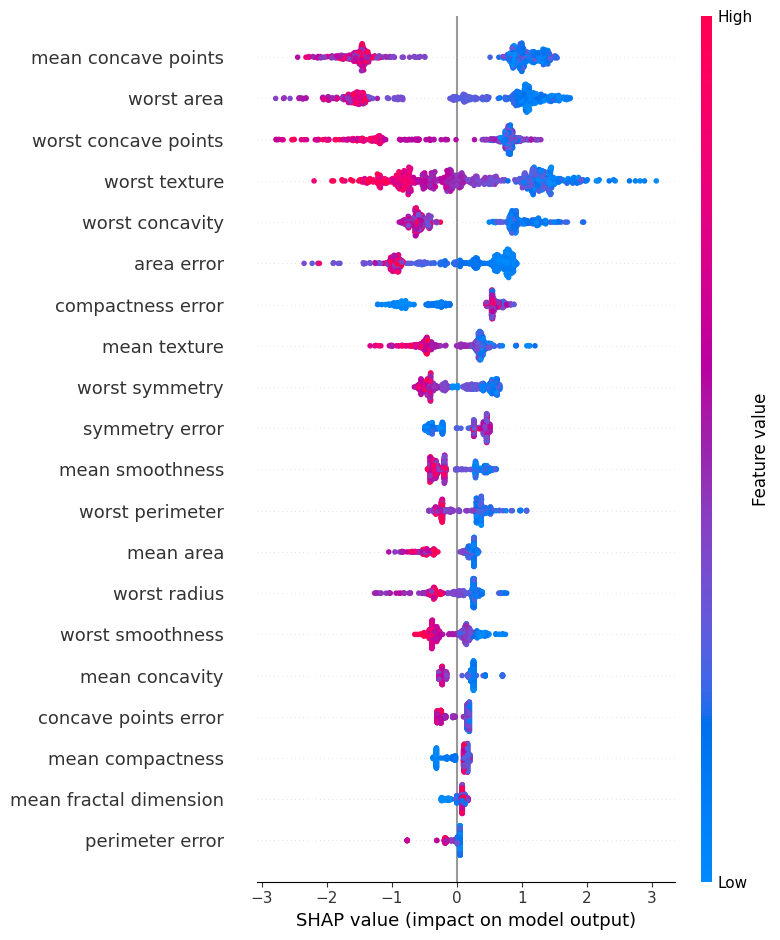

In [31]:
shap.summary_plot(shap_values, x, feature_names=data.feature_names)

---

### ✅ 2. **Feature Dependence Plot**

### 🔍 What this shows:

* Plots **SHAP value** of a single feature (like `"mean concave points"`) against its actual value.

* Helps answer:

  > "How does changing this feature affect the prediction?"

### 🔹 Step 6B: Feature Dependence Plot

📌 Shows how values of `"mean concave points"` influence the prediction.
Color shows interaction with another feature (e.g., `"worst texture"`).

---

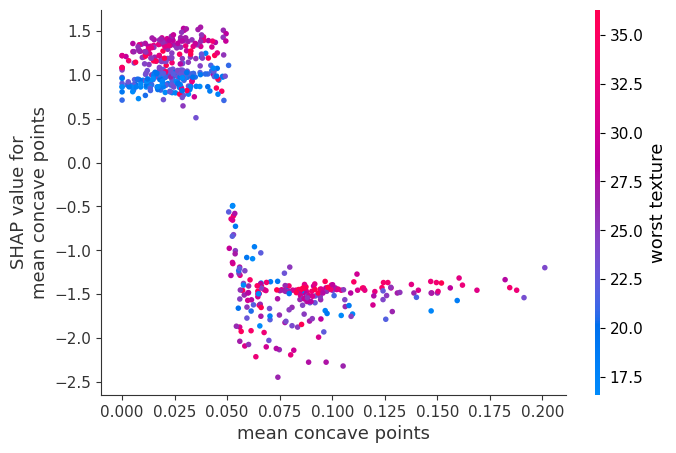

In [35]:
shap.dependence_plot("mean concave points", shap_values, x, feature_names=data.feature_names)

## 📊 What This Plot Shows

This is a **SHAP Dependence Plot** for the feature `mean concave points`.

### Axes:

* **X-axis**: Actual value of `mean concave points` (from the dataset)

* **Y-axis**: SHAP value (impact of that value on the model output)

* **Color**: Interaction with another feature — here it's **`worst texture`**

---

## ✅ Interpretation Step-by-Step

### 🔹 1. **Overall Shape of the Plot**

* For **low values** of `mean concave points` (left side):

  * SHAP values are **positive** → pushes prediction toward **benign (class 1)**

* For **high values** of `mean concave points` (right side):

  * SHAP values are **negative** → pushes prediction toward **malignant (class 0)**

✅ This matches our earlier interpretation from the SHAP summary plot.

---

### 🔹 2. **Threshold Behavior (\~0.05)**

* Around **0.05**, there's a noticeable change:

  * Left of 0.05: SHAP > 0 → benign

  * Right of 0.05: SHAP < 0 → malignant

✅ So **0.05** acts like a "cutoff" — tumors with `mean concave points > 0.05` are likely predicted as **malignant**.

---

### 🔹 3. **Color = `worst texture` interaction**

* **Pink/red dots**: high `worst texture`

* **Blue dots**: low `worst texture`

🧠 What this means:

* For **similar `mean concave points` values**, a higher `worst texture` (pink/red) sometimes increases the SHAP value slightly — meaning the prediction is a bit more toward **benign**.

* So there’s a **feature interaction**:

  * When `mean concave points` is high, **a lower `worst texture` intensifies the malignant prediction**

---

## 🧠 Summary Interpretation:

> 🔍 **SHAP Dependence Plot Insight**

> As the value of `mean concave points` increases beyond \~0.05, the SHAP value becomes more negative — pushing predictions strongly toward **malignant (class 0)**. This confirms that tumors with more concave (irregular) points are more likely to be malignant. Additionally, the interaction with `worst texture` shows that low `worst texture` values (blue) enhance the malignancy signal, while high `worst texture` (red) slightly softens it.

---


### ✅ 3. **Per-Instance Explanation (force\_plot)**

### 🔍 What this shows:

* A **single prediction explained like a tug-of-war**.
✅ Use it when you want to answer:

> “Why did the model make *this* particular prediction?”

### 🔹 Step 6C: Force Plot — Per Instance Explanation

🎯 Explains **why** the model made the first prediction.
Red features pushed it **higher**, blue pulled it **lower**.

---

In [38]:
shap.force_plot(explainer.expected_value, shap_values[0, :], x[0, :])  
#shap.force_plot(...) : This function generates an interactive visual explanation showing which features pushed the prediction up or down.
#explainer.expected_value : This is the base value — what the model would predict if it knew nothing (i.e., the average prediction across all data).
#shap_values[0, :] : The SHAP values for the first data point (index 0), showing how each feature contributed to that specific prediction.
#x[0, :] : The original feature values of the first row in x — this makes the plot easier to interpret by showing actual inputs.

## 🔍 What this SHAP Force Plot shows:

You're analyzing the **first prediction in your dataset** (`x[0, :]`).

---

### ✅ Key Components:

* **Base value (0.6583)**:


  This is the average model output (in log-odds or raw output space) over the whole dataset.

* **Final prediction `f(x) = -5.42`**:


  The model's prediction for this specific instance.


  It is **much lower than the base value**, meaning the model is **very confident it belongs to class 0 (malignant)**.

* **Red arrows (left)**:


  Features that **pushed the prediction lower** (toward class 0 = malignant).

* **Blue arrows (right)**:


  Features that **pushed the prediction higher** (toward class 1 = benign).

---

## 🔎 Interpretation of the Plot:

### 🔴 Features that strongly pushed toward **malignant** (class 0):

These features (on the left in red) caused the prediction to **drop from the base value (0.6583) to -5.42**:

* `mean concave points = 0.03003`

* `worst concave points = 0.04904`

* `worst area = 10.38`

* `mean area = 17.33`

These values are **high** for these features, and since they’re known to indicate malignancy, they pulled the prediction **strongly toward class 0**.

---

### 🔵 Features that pushed slightly toward **benign** (class 1):

These features (in blue, on the right) **pushed the prediction upward** but not strongly enough to outweigh the red:

* Examples:

  `mean smoothness = 0.1471`

  `mean compactness = 0.2654`

  `mean texture = 20.19`

  `worst symmetry`, etc.

They had **lower SHAP impact** (small arrows), meaning they didn’t contribute much to pushing the prediction toward benign.

---

## ✅ Final Conclusion:

> 🔍 For this particular patient/data point:


> * The model predicted the output as **malignant (class 0)** with **high confidence** (`f(x) = -5.42`).

> * The decision was mainly driven by **high values** of `mean concave points`, `worst area`, and `mean area`, all of which are known indicators of malignancy.

> * Although some features pushed toward benign, they had much smaller effects.

---

## ✅ Conclusion:

* SHAP helps you understand both **global** and **local** model decisions.
* It is model-agnostic and widely used for **transparent AI**.

---